<a href="https://colab.research.google.com/github/AndreiMoraru123/Optimization/blob/main/GradientDescent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

I'd like to take you throught the core algorithm used in error minimization for artificial neural networks. As the title has already given it away, I will present the Steepest Descent/ Gradient algorithm.

What gradient descent really does is minimize a function using it's slope (first order derivative) as the direction in which the algorithms should search, making steps in that direction as fast or as slow as a hyperparameter, usually called ***learning rate*** in Deep Learning or ***step*** in optimization and mathematics, allows it to.



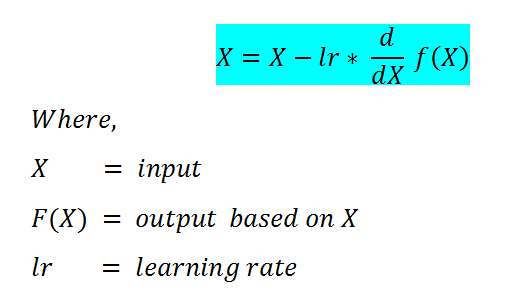

Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
from IPython.display import display, Math, Latex

Define the 2D function:

In [2]:
def fcn(x, y):
    x, y = np.meshgrid(x, y)
    z = np.exp(x ** 2) + y ** 2 - 3 + 2 * y
    return z

display(Math(f' f(x,y) = exp(x^2) + y^2 + 2y - 3 '))

<IPython.core.display.Math object>

In [3]:
x = np.linspace(-3, 3, 201)
y = np.linspace(-3, 3, 201)

Z = fcn(x, y)

sx, sy = sym.symbols('sx,sy')

sZ = sym.exp(sx ** 2) + sy ** 2 - 3 + 2 * sy

df_x = sym.lambdify((sx, sy), sym.diff(sZ, sx), 'sympy')
df_y = sym.lambdify((sx, sy), sym.diff(sZ, sy), 'sympy')

Tuning Parameters:

In [16]:
localmin = np.random.randn(2)
statpnt = localmin[:]

learning_rate = .01
training_epochs = 1000

Thanks **Mike X Cohen** for the algo workflow. Go check him out if you haven't already: https://mikexcohen.com/

In [17]:
modelparamsGrad = np.zeros((training_epochs, 2))
modelparamsLR = np.zeros((training_epochs, 1))
trajectory = np.zeros((training_epochs, 2))
for i in range(training_epochs):
    grad = np.array([df_x(localmin[0], localmin[1]),
                     df_y(localmin[0], localmin[1])
                     ])

    lr = learning_rate * (1 - (i + 1) / training_epochs)
    # lr = learning_rate * np.abs(grad[0])
    gradNorm = np.linalg.norm(grad.astype(float), 2)
    localmin = localmin - learning_rate * np.divide(grad, gradNorm)
    trajectory[i, :] = localmin
    modelparamsGrad[i, :] = grad[0]
    modelparamsLR[i, :] = lr

print(localmin)

[0.00381491132083661 -0.9913301692002774]


And now let's see the results

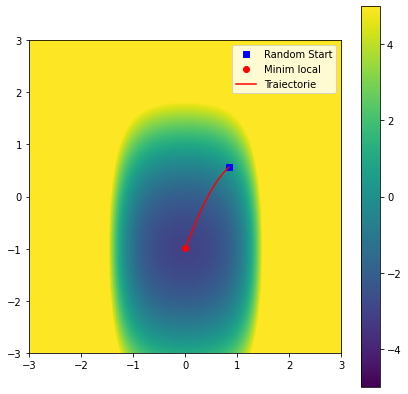

In [18]:
plt.figure(figsize = (7,7))
plt.imshow(Z, extent=[x[0], x[-1], y[0], y[-1]], vmin=-5, vmax=5, origin='lower')
plt.plot(statpnt[0], statpnt[1], 'bs')
plt.plot(localmin[0], localmin[1], 'ro')
plt.plot(trajectory[:, 0], trajectory[:, 1], 'r')
plt.legend(['Random Start', 'Minim local', 'Traiectorie'])
plt.colorbar()
plt.show()

Our quest of finding of minima converges nicely as one would expect.

So far, so good. But real life optimization problems usually come with some form of constraint. For instance, you want to maximize the profit of your business, but your founds, resources and time are limited, so you cannot expand it ad infinitunm. Minimation works in the same way, the ideea is just reversed.

Usually, one would want to spend everything they can, so that would make the restriction an **equality** constraint

Enter the ***Projected*** **Gradient Descent**  algorithm:

In [9]:
def projection(locmin):
    y = []
    locmin[0] = - 1/3 * locmin[1]
    y.append(locmin[0])
    y.append(locmin[1])
    y = np.array(y)
    return y

def conFcn(x,y):
    x,y = np.meshgrid(x,y)
    sz = 3 * x + y
    return sz

x = np.linspace(-3, 3, 201)
y = np.linspace(-3, 3, 201)

Zz = conFcn(x, y)

display(Math(f' g(x,y) = 3x + y'))

<IPython.core.display.Math object>

In [19]:
localmin = statpnt[:]
statpnt = localmin[:]

modelparamsGrad = np.zeros((training_epochs, 2))
modelparamsLR = np.zeros((training_epochs, 1))
trajectory = np.zeros((training_epochs, 2))
for i in range(training_epochs):
    grad = np.array([df_x(localmin[0], localmin[1]),
                     df_y(localmin[0], localmin[1])
                     ])

    lr = learning_rate * (1 - (i + 1) / training_epochs)
    # lr = learning_rate * np.abs(grad[0])
    gradNorm = np.linalg.norm(grad.astype(float), 2)
    localmin = localmin - learning_rate * np.divide(grad, gradNorm)
    
    # Here we activate the projection
    localmin= projection(localmin)
    
    trajectory[i, :] = localmin
    modelparamsGrad[i, :] = grad[0]
    modelparamsLR[i, :] = lr

print(localmin)

[ 0.33333333 -1.        ]


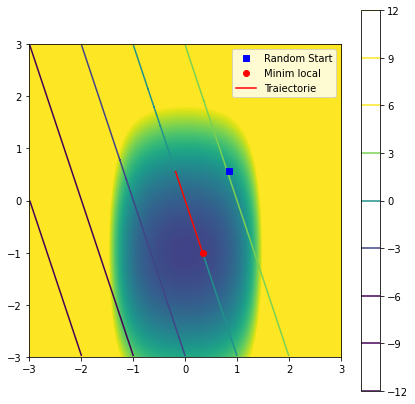

In [20]:
plt.figure(figsize = (7,7))
plt.imshow(Z, extent=[x[0], x[-1], y[0], y[-1]], vmin=-5, vmax=5, origin='lower')
plt.contour(Zz, extent=[x[0], x[-1], y[0], y[-1]], vmin=-5, vmax=5, origin='lower')
plt.plot(statpnt[0], statpnt[1], 'bs')
plt.plot(localmin[0], localmin[1], 'ro')
plt.plot(trajectory[:, 0], trajectory[:, 1], 'r')
plt.legend(['Random Start', 'Minim local', 'Traiectorie'])
plt.colorbar()
plt.show()

As you can see, I forced the algo to take steps only on the feasible domain, which are the lines of the linear constraint function defined above